In [1]:
import sys
import csv
import tweepy
import matplotlib.pyplot as plt

from collections import Counter
from aylienapiclient import textapi

In [41]:
## AYLIEN credentials
application_id = "YOUR_APPLICATION_ID"
application_key = "YOUR_APPLICATION_KEY" 

In [3]:
## set up an instance of the AYLIEN Text API
client = textapi.Client(application_id, application_key)

In [4]:
## search Twitter for something that interests you
query = raw_input("What subject do you want to analyze for this example? \n")
number = raw_input("How many Tweets do you want to analyze? \n")

What subject do you want to analyze for this example? 
airline delay
How many Tweets do you want to analyze? 
50


In [5]:
## set up an instance of Tweepy
consumer_key = "YOUR_TWEEPY_CONSUMER_KEY"
consumer_secret = "YOUR_CONSUMER_SECRET"
access_token = "YOUR_ACCESS_TOKEN"
access_token_secret = "YOUR_ACCESS_TOKEN_SECRET"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [6]:
from TwitterAPI import TwitterAPI
results = api.search(
   lang="en",
   q=query + " -rt",
   count=number,
   result_type="recent"
)

In [7]:
print("--- Gathered Tweets \n")

--- Gathered Tweets 



In [8]:
## open a csv file to store the Tweets and their sentiment 
file_name = 'Sentiment_Analysis_of_{}_Tweets_About_{}.csv'.format(number, query)

with open(file_name, 'w') as csvfile:
   csv_writer = csv.DictWriter(
       f=csvfile,
       fieldnames=["Tweet", "Sentiment"]
   )
   csv_writer.writeheader()

   print("--- Opened a CSV file to store the results of your sentiment analysis... \n")

## tidy up the Tweets and send each to the AYLIEN Text API
   for c, result in enumerate(results, start=1):
       tweet = result.text
       tidy_tweet = tweet.strip().encode('ascii', 'ignore')

       if len(tweet) == 0:
           print('Empty Tweet')
           continue

       response = client.Sentiment({'text': tidy_tweet})
       csv_writer.writerow({
           'Tweet': response['text'],
           'Sentiment': response['polarity']
       })

       print("Analyzed Tweet {}".format(c))
#http://blog.aylien.com/build-a-sentiment-analysis-tool-for-twitter-with-this-simple-python-script/

--- Opened a CSV file to store the results of your sentiment analysis... 

Analyzed Tweet 1
Analyzed Tweet 2
Analyzed Tweet 3
Analyzed Tweet 4
Analyzed Tweet 5
Analyzed Tweet 6
Analyzed Tweet 7
Analyzed Tweet 8
Analyzed Tweet 9
Analyzed Tweet 10
Analyzed Tweet 11
Analyzed Tweet 12
Analyzed Tweet 13
Analyzed Tweet 14
Analyzed Tweet 15
Analyzed Tweet 16
Analyzed Tweet 17
Analyzed Tweet 18
Analyzed Tweet 19
Analyzed Tweet 20
Analyzed Tweet 21
Analyzed Tweet 22
Analyzed Tweet 23
Analyzed Tweet 24
Analyzed Tweet 25
Analyzed Tweet 26
Analyzed Tweet 27
Analyzed Tweet 28
Analyzed Tweet 29
Analyzed Tweet 30
Analyzed Tweet 31
Analyzed Tweet 32
Analyzed Tweet 33
Analyzed Tweet 34
Analyzed Tweet 35
Analyzed Tweet 36
Analyzed Tweet 37
Analyzed Tweet 38
Analyzed Tweet 39
Analyzed Tweet 40
Analyzed Tweet 41
Analyzed Tweet 42
Analyzed Tweet 43
Analyzed Tweet 44
Analyzed Tweet 45
Analyzed Tweet 46
Analyzed Tweet 47
Analyzed Tweet 48
Analyzed Tweet 49
Analyzed Tweet 50


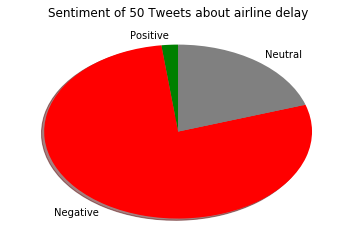

In [9]:
## count the data in the Sentiment column of the CSV file 
with open(file_name, 'r') as data:
   counter = Counter()
   for row in csv.DictReader(data):
       counter[row['Sentiment']] += 1

   positive = counter['positive']
   negative = counter['negative']
   neutral = counter['neutral']

## declare the variables for the pie chart, using the Counter variables for "sizes"
colors = ['green', 'red', 'grey']
sizes = [positive, negative, neutral]
labels = 'Positive', 'Negative', 'Neutral'

## use matplotlib to plot the chart
plt.pie(
   x=sizes,
   shadow=True,
   colors=colors,
   labels=labels,
   startangle=90
)

plt.title("Sentiment of {} Tweets about {}".format(number, query))
plt.show()

Majority of the current tweets on airline delay shows negative sentiment, possibly because of the increase in volumne of holiday travels and delays possibly related to weathers and cancellations.